# Propagación de la Afinidad

## 1. Libraries

In [25]:
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

## 2. Dataset

In [26]:
centers = [[1,1],[-1,-1],[1,-1]]
X, labels = make_blobs(n_samples=300, centers=centers,cluster_std=0.5, random_state=0)

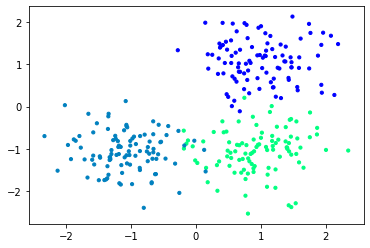

In [27]:
plt.scatter(X[:,0],X[:,1],c=labels,cmap='winter',s=10);

## 3. Model

In [28]:
def report_affinity_propagation(X):
    
    af = AffinityPropagation(preference=-50).fit(X)
    cluster_centers_ids = af.cluster_centers_indices_
    n_clust = len(cluster_centers_ids)
    
    clust_labels = af.labels_
    
    print('Modelo ha generado %s clusters'%n_clust)
    print('Homogeneidad: %0.3f'%metrics.homogeneity_score(labels,clust_labels)) # Cuantas han sido correctamente clasificadas
    print('Completitud: %0.3f'%metrics.completeness_score(labels,clust_labels))
    print('V-measure: %0.3f'%metrics.v_measure_score(labels,clust_labels))
    print('R2 Ajustado: %0.3f'%metrics.adjusted_rand_score(labels,clust_labels))
    print('Información mútua ajustada: %0.3f'%metrics.adjusted_mutual_info_score(labels,clust_labels))
    print('Coeficiente de Silueta: %0.3f'%metrics.silhouette_score(X,labels,metric='sqeuclidean'))
    
    plt.figure(figsize=(16,9))
    plt.clf()
    
    colors=cycle('bgrcmykbgrcmykbgrcmykbgrcmykbgrcmyk')
    for k,col in zip(range(n_clust),colors):
        class_member = (clust_labels==k)
        clust_center = X[cluster_centers_ids[k]]
        plt.plot(X[class_member,0],X[class_member,1],col+'.')
        plt.plot(clust_center[0],clust_center[1],'o',markerfacecolor=col,markeredgecolor='k',markersize=14)
        for x in X[class_member]:
            plt.plot([clust_center[0],x[0]],[clust_center[1],x[1]],col)
    plt.title('Número Estimado de clusters %d'%n_clust)

Modelo ha generado 3 clusters
Homogeneidad: 0.872
Completitud: 0.872
V-measure: 0.872
R2 Ajustado: 0.912
Información mútua ajustada: 0.871
Coeficiente de Silueta: 0.735


/home/eduardo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


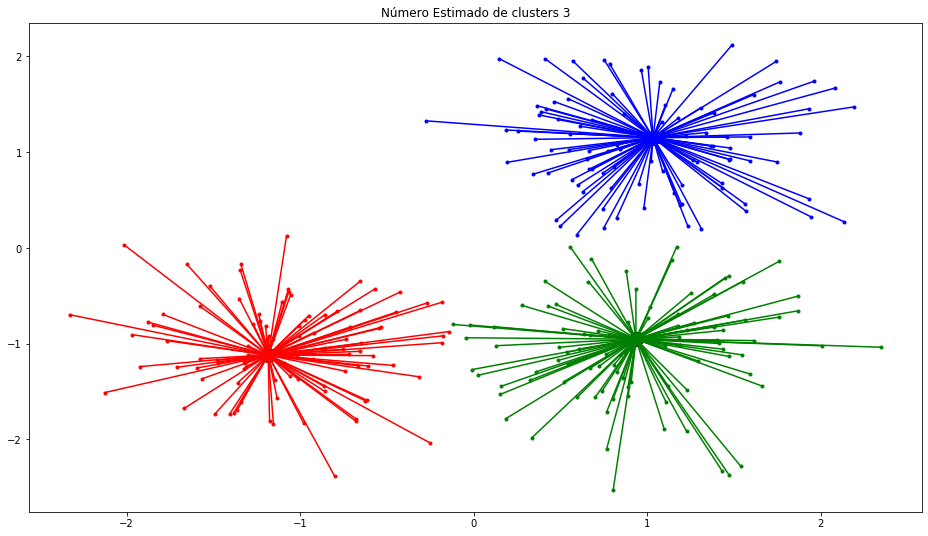

In [29]:
report_affinity_propagation(X)